**Project Overview-** The goal of this project is to analyze market data of 18 different ETFs in order to create a well balanced porfolio that meets the needs of a 59-year-old investor. This investor is nearing retirement, but does not have enough invested into a retirement fund to support their lifestyle when they eventually retire. Due to this, they are hoping to develop a portfolio that is aggressive enough to help them catch up, while still being stable enough to hedge the risk of losing all their current savings. Our investor is risk-moderate and wants to invest in funds rather than individual equities.

**Goal Return-** The investor of this portfolio is hoping to realize a return about in line with the market, possibly a bit more if possible. They would be satisfied with a return of 10.5%.

**Goal Beta (risk)-** The investor of this portfolio is willing to invest with a beta of 0.85. Given the volitility of the market in the past year, they want to be careful in taking on too much risk. However, they are willing to take on more than a traditional late stage retirement fund in order to open up the opportunty for greater return. 

**Goal Allocation-** The investor, in hopes to atain their desired returns would like an investment mix with 65% invested in equities and 35% invested in stable funds.

**Questions to Answer**

1. How wide is the range of returns found in the data set?
2. Which fund types provide the highest return? Which fund types provide the best dividends?
3. What was the overall performance of all these funds over the past five years? What about the individual fund types? 
4. How much return can I expect to realize should I invest in these funds? (What is the average APR of return for each fund?)
5. How risky is each individual fund? (Standard Deviation)
6. How does the riskiness of these funds compare to the overall market? (Beta)
7. How do the returns on these funds compare to the overall market? 
8. What are the expected returns of these individual funds, calculated using their betas? (CAPM)
9. How do the funds' returns relate to their relative risk? (Sharpe Ratio)
10. How do the expected returns of these individual funds compare to their actual returns? (Alpha)
11. Which funds appear do be undervalued? (Security Market Line)
12. What is the ideal mix/allocation of funds to match the goals of this portfolio?

# **Step 1: Import Pandas / Numpy / Plotly Libraries**

In [1]:
if 'google.colab' in str(get_ipython()):
  !pip install plotly==4.14.3

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy.stats import linregress

#**Step 2: Load Data from GitHub and Explore**

In [3]:
df = pd.read_csv('https://github.com/zachcep/Portfolio-Analysis/raw/main/PortfolioAnalysisData.csv',encoding='iso-8859-1')
df

,Date,Fund,Type,Open,Close,Dividend
0,6/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,81.500000,83.239998,NaN
1,7/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.279999,85.150002,0.446
2,8/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.120003,85.160004,NaN
3,9/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.099998,83.930000,0.393
4,10/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.739998,82.309998,NaN
...,...,...,...,...,...,...
1135,1/1/2021,S&P 500 (GCSPC),Market,3764.610000,3714.240000,NaN
1136,2/1/2021,S&P 500 (GCSPC),Market,3731.170000,3811.150000,NaN
1137,3/1/2021,S&P 500 (GCSPC),Market,3842.510000,3972.890000,NaN
1138,4/1/2021,S&P 500 (GCSPC),Market,3992.780000,4181.170000,NaN


In [4]:
df['Fund'] = df['Fund'].str.replace('\\xa0', ' ')

In [5]:
df.shape

(1140, 6)

In [6]:
df.info

<bound method DataFrame.info of            Date  ... Dividend
0      6/1/2016  ...      NaN
1      7/1/2016  ...    0.446
2      8/1/2016  ...      NaN
3      9/1/2016  ...    0.393
4     10/1/2016  ...      NaN
...         ...  ...      ...
1135   1/1/2021  ...      NaN
1136   2/1/2021  ...      NaN
1137   3/1/2021  ...      NaN
1138   4/1/2021  ...      NaN
1139   5/1/2021  ...      NaN

[1140 rows x 6 columns]>

In [7]:
df.head(100)

,Date,Fund,Type,Open,Close,Dividend
0,6/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,81.500000,83.239998,NaN
1,7/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.279999,85.150002,0.446
2,8/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.120003,85.160004,NaN
3,9/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.099998,83.930000,0.393
4,10/1/2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.739998,82.309998,NaN
...,...,...,...,...,...,...
95,5/1/2019,Schuab U.S. Divided Equity (SCHD),Income,54.070000,49.860001,NaN
96,6/1/2019,Schuab U.S. Divided Equity (SCHD),Income,49.959999,53.070000,NaN
97,7/1/2019,Schuab U.S. Divided Equity (SCHD),Income,53.730000,53.950001,0.421
98,8/1/2019,Schuab U.S. Divided Equity (SCHD),Income,53.910000,53.250000,NaN


In [8]:
df.tail(100)

,Date,Fund,Type,Open,Close,Dividend
1040,2/1/2018,Vanguard FTSE All-World ex-US Small-Cap Index ...,Small Cap,124.699997,119.000000,NaN
1041,3/1/2018,Vanguard FTSE All-World ex-US Small-Cap Index ...,Small Cap,118.820000,119.239998,NaN
1042,4/1/2018,Vanguard FTSE All-World ex-US Small-Cap Index ...,Small Cap,119.000000,119.610001,0.04
1043,5/1/2018,Vanguard FTSE All-World ex-US Small-Cap Index ...,Small Cap,119.360001,119.449997,NaN
1044,6/1/2018,Vanguard FTSE All-World ex-US Small-Cap Index ...,Small Cap,120.080002,115.410004,NaN
...,...,...,...,...,...,...
1135,1/1/2021,S&P 500 (GCSPC),Market,3764.610000,3714.240000,NaN
1136,2/1/2021,S&P 500 (GCSPC),Market,3731.170000,3811.150000,NaN
1137,3/1/2021,S&P 500 (GCSPC),Market,3842.510000,3972.890000,NaN
1138,4/1/2021,S&P 500 (GCSPC),Market,3992.780000,4181.170000,NaN


In [9]:
df.sample(100)

,Date,Fund,Type,Open,Close,Dividend
510,12/1/2018,iShares Core S&P Mid-Cap (IJH),Growth,190.350006,166.059998,NaN
185,11/1/2016,Vanguard Short-Term Corporate Bond Index Fund ...,Bonds,80.180000,79.419998,0.137
627,9/1/2018,Vanguard S&P 500 (VOO),Large Cap,266.350006,267.049988,NaN
342,12/1/2019,Invesco National AMT-Free Municipal Bond (PZA),Bonds,26.430000,26.459999,0.060
643,1/1/2020,Vanguard S&P 500 (VOO),Large Cap,297.290009,295.690002,1.429
...,...,...,...,...,...,...
726,12/1/2016,Vanguard Mid-Cap Index Fund (VO),Mid Cap,131.850006,131.630005,NaN
229,7/1/2020,Vanguard Short-Term Corporate Bond Index Fund ...,Bonds,82.510002,83.099998,0.152
133,7/1/2017,iShares International Select Dividend (IDV),Income,32.700001,33.509998,0.568
222,12/1/2019,Vanguard Short-Term Corporate Bond Index Fund ...,Bonds,80.889999,81.029999,0.183


#**Step 3: Adjusting Datetime Columns**

Since the dates columns in the data set are not formatted to be read as DateTime, we have to convert them in order to organize data by dates. I also want to split the "Date" column into two separate "Month" and "Year" columns to make grouping the data simpler.

In [10]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df2 = df[['Month','Year','Fund','Type','Open','Close','Dividend']]
df2['Dividend'] = df2['Dividend'].fillna(0)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Month,Year,Fund,Type,Open,Close,Dividend
0,6,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,81.500000,83.239998,0.000
1,7,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.279999,85.150002,0.446
2,8,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.120003,85.160004,0.000
3,9,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.099998,83.930000,0.393
4,10,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.739998,82.309998,0.000
...,...,...,...,...,...,...,...
1135,1,2021,S&P 500 (GCSPC),Market,3764.610000,3714.240000,0.000
1136,2,2021,S&P 500 (GCSPC),Market,3731.170000,3811.150000,0.000
1137,3,2021,S&P 500 (GCSPC),Market,3842.510000,3972.890000,0.000
1138,4,2021,S&P 500 (GCSPC),Market,3992.780000,4181.170000,0.000


#**Step 4: Aggregate Monthly Returns**

The first aggregation of data we will need in order to continue analyzing the data is "Monthly Returns." This is found by subtracting the "Open" price from the "Close" price, adding the "Dividend" and dividing by the "Open" price. This will give us the percentage change in the fund price, while considering the dividend distribution to get the returns for that specific month.

In [11]:
df2['Monthly Returns'] = ((df2['Close'] - df2['Open'] + df2['Dividend'])/df2['Open'])
df2

,Month,Year,Fund,Type,Open,Close,Dividend,Monthly Returns
0,6,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,81.500000,83.239998,0.000,0.021350
1,7,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.279999,85.150002,0.446,0.027810
2,8,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.120003,85.160004,0.000,0.000470
3,9,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,85.099998,83.930000,0.393,-0.009130
4,10,2016,Vanguard Dividend Appreciation Index Fund (VIG),Income,83.739998,82.309998,0.000,-0.017077
...,...,...,...,...,...,...,...,...
1135,1,2021,S&P 500 (GCSPC),Market,3764.610000,3714.240000,0.000,-0.013380
1136,2,2021,S&P 500 (GCSPC),Market,3731.170000,3811.150000,0.000,0.021436
1137,3,2021,S&P 500 (GCSPC),Market,3842.510000,3972.890000,0.000,0.033931
1138,4,2021,S&P 500 (GCSPC),Market,3992.780000,4181.170000,0.000,0.047183


We will visualize the spread of these monthly returns in our graphs below. This will help us develop an understanding of the density of specific returns amongst the 1000+ monthly returns in the dataset.

In [12]:
returns_fig = px.box(data_frame=df2,x='Monthly Returns',orientation='h',title='Monthly Returns',template='plotly_dark')
returns_fig.show()

In [13]:
returns_fig2 = px.histogram(data_frame=df2,x='Monthly Returns',nbins=6,title='Monthly Returns Spread',template='plotly_dark')
returns_fig2.show()

#**Step 5: Analyze Data by Fund Type**

Next, using the monthly returns aggregated in the new general dataframe, we want to group the data by "Fund Type" and aggregate "Avg Monthly Returns" and "Avg Monthly Dividend." We can then use the information found to compare investments in the different fund types.

In [14]:
df_type = df2.groupby(by='Type',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean'})
df_type.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)
df_type.sort_values(by='Avg Monthly Returns',ascending=False,inplace=True)
df_type

,Type,Avg Monthly Returns,Avg Monthly Dividend
1,Growth,0.018530,0.147133
4,Market,0.011657,0.000000
5,Mid Cap,0.010887,0.103500
2,Income,0.010518,0.141272
3,Large Cap,0.010495,0.165056
6,Small Cap,0.009619,0.165989
0,Bonds,0.003471,0.081572


We can update the previous dataframe and find the "Avg Yearly Returns" and "Avg Yearly Dividend" by multiplying the "Avg Monthly Returns" and "Avg Monthly Dividend" columns by 12. This will give us a better idea of what returns to expect from these different fund types each year. A yearly view of returns will provide more insight in regards to retirement planning.

In [15]:
df_type['Avg Yearly Returns'] = df_type['Avg Monthly Returns']*12
df_type['Avg Yearly Dividend'] = df_type['Avg Monthly Dividend']*12
df_type_yearly = df_type.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_type_yearly

,Type,Avg Yearly Returns,Avg Yearly Dividend
1,Growth,0.222363,1.765600
4,Market,0.139879,0.000000
5,Mid Cap,0.130643,1.242000
2,Income,0.126215,1.695267
3,Large Cap,0.125934,1.980667
6,Small Cap,0.115429,1.991867
0,Bonds,0.041651,0.978867


We will visualize the yearly returns and yearly dividends for each fund type in our graphs below. This will help us develop an understanding of the different fund types when compared to one another.

In [16]:
type_fig = px.bar(data_frame=df_type_yearly,x='Type',y='Avg Yearly Returns',title='Returns by Fund Type',template='plotly_dark')
type_fig.show()

In [17]:
type_fig2 = px.bar(data_frame=df_type_yearly,x='Type',y='Avg Yearly Dividend',title='Dividend by Fund Type',template='plotly_dark')
type_fig2.show()

#**Step 6: Analyze Data by Year**

Next, using the monthly returns aggregated in Step 4, we want to group the data by "Year" and aggregate "Avg Monthly Returns" and "Avg Monthly Dividend." We can then use the information found to observe trends and market performance over the past five years.

In [18]:
df_by_year = df2.groupby(by='Year',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean'})
df_by_year.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)
df_by_year.sort_values(by='Year',ascending=False,inplace=True)
df_by_year

,Year,Avg Monthly Returns,Avg Monthly Dividend
5,2021,0.012241,0.165232
4,2020,0.017435,0.134509
3,2019,0.018692,0.135610
2,2018,-0.005832,0.131947
1,2017,0.012816,0.113592
0,2016,0.008577,0.086820


We can update the previous dataframe and find the "Avg Yearly Returns" and "Avg Yearly Dividend" by multiplying the "Avg Monthly Returns" and "Avg Monthly Dividend" columns by 12. This will give us a better idea of what the yearly returns looked like over each of the past five years. A yearly view of returns will provide more insight in regards to retirement planning.

In [19]:
df_by_year['Avg Yearly Returns'] = df_by_year['Avg Monthly Returns']*12
df_by_year['Avg Yearly Dividend'] = df_by_year['Avg Monthly Dividend']*12
df_by_year_yearly = df_by_year.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_by_year_yearly

,Year,Avg Yearly Returns,Avg Yearly Dividend
5,2021,0.146897,1.982779
4,2020,0.209217,1.614105
3,2019,0.224300,1.627316
2,2018,-0.069986,1.583368
1,2017,0.153795,1.363105
0,2016,0.102929,1.041835


We will visualize the yearly returns and yearly dividends over the past five years in our graphs below. Again, this will help us develop an understanding of the trends and market performance over the past five years.

In [20]:
by_year_fig = px.line(data_frame=df_by_year_yearly,x='Year',y='Avg Yearly Returns',title='Returns Over Past 5-Years',template='plotly_dark')
by_year_fig.show()

In [21]:
by_year_fig2 = px.line(data_frame=df_by_year_yearly,x='Year',y='Avg Yearly Dividend',title='Dividend Over Past 5-Years',template='plotly_dark')
by_year_fig2.show()

# **Step 7: Graph Data by Both Year and Fund**

While seeing the general performance of the dataset over the past five years is interesting to see, dividing the visuals up by fund type will likely provide more insight for the purposes of portfolio creation. Graphs with five year returns and dividends split by fund type are found below.

### **Returns By Fund**

In [22]:
df_graph = df2.groupby(by=['Year','Type'],as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean'})
df_graph.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)
df_graph.sort_values(by='Year',ascending=False,inplace=True)
df_graph['Avg Yearly Returns'] = df_graph['Avg Monthly Returns']*12
df_graph['Avg Yearly Dividend'] = df_graph['Avg Monthly Dividend']*12
df_graph2 = df_graph.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])

In [23]:
by_both_fig = px.line(data_frame=df_graph2,x='Year',y='Avg Yearly Returns',color='Type',title='Returns Over Past 5-Years by Fund Type',template='plotly_dark')
by_both_fig.show()

### **Dividends By Fund**

In [24]:
by_both_fig2 = px.line(data_frame=df_graph,x='Year',y='Avg Yearly Dividend',color='Type',title='Dividend Over Past 5-Years by Fund Type',template='plotly_dark')
by_both_fig2.show()

#**Step 8: Analyze Funds Individually by Type**

Now that we have analyzed the entire dataset by grouping by Fund Type and Year, we will now take a deeper, more in depth look at the indivudal funds contained within these Fund Type groups. This is where the bulk of our analysis will take place, and the aggregate information gained from this analysis will help us develop our portfolio.

###**Create Dataframes for Each Fund Type**

The following code creates seven dataframes, one for each Fund Type and one for the general market (based on the S&P 500).

In [25]:
df2.Type.unique()

array(['Income', 'Bonds', 'Growth', 'Large Cap', 'Mid Cap', 'Small Cap',
       'Market'], dtype=object)

In [26]:
df_income = df2[df2['Type'] == 'Income']
df_bonds = df2[df2['Type'] == 'Bonds']
df_growth = df2[df2['Type'] == 'Growth']
df_large_cap = df2[df2['Type'] == 'Large Cap']
df_mid_cap = df2[df2['Type'] == 'Mid Cap']
df_small_cap = df2[df2['Type'] == 'Small Cap']
df_market = df2[df2['Type'] == 'Market']

###**Income Funds**

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [27]:
df_income['St.Dev of Returns'] = df_income['Monthly Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df_income2 = df_income.groupby(by='Fund',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean','St.Dev of Returns':'std'})
df_income2.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)

We then multiply the "Avg Monthly Returns" column by 12 and change the column name to "APR" or the annual percentage rate (return) of the asset. We drop the dividend column to focus more on the return vs. risk of the assets.

In [29]:
df_income2['APR'] = df_income2['Avg Monthly Returns']*12
df_income2['Avg Yearly Dividend'] = df_income2['Avg Monthly Dividend']*12
df_income3 = df_income2.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_income4 = df_income3.drop(columns='Avg Yearly Dividend')

***Monthly Income Fund Returns for Beta Calculations***

The following code isolates the monthly returns for each asset into a new dataframe represented by the fund's ticker symbol. Using an imported regression tool, this new dataframe will be regressed with monthly market returns (based on the S&P 500), the slope of which will tell us the beta, or the asset's risk, relative to the market.

In [30]:
SCHD = df_income[df_income['Fund'] == 'Schuab U.S. Divided Equity (SCHD)']['Monthly Returns']
VIG = df_income[df_income['Fund'] == 'Vanguard Dividend Appreciation Index Fund (VIG)']['Monthly Returns']
IDV = df_income[df_income['Fund'] == 'iShares International Select Dividend (IDV)']['Monthly Returns']
Market = df_market['Monthly Returns']

***Final Income Fund Table***

Using the dataframes and tools mentioned above, we will create a new dataset and convert it to a dataframe, inserting all of our desired information into one single table. The information shown will provide insight into the return vs. risk for each fund and will be useful when determining our final portfolio investment mix.


In [31]:
income_core_data = {'Fund':['Schuab U.S. Divided Equity (SCHD)','Vanguard Dividend Appreciation Index Fund (VIG)','iShares International Select Dividend (IDV)'],'APR':[0.154745,0.142106,0.081792],'St.Dev of Returns':[0.047604,0.042099,0.054880],'Beta':[linregress(SCHD,Market)[0],linregress(VIG,Market)[0],linregress(IDV,Market)[0]]}
df_income_core = pd.DataFrame(income_core_data,columns=['Fund','APR','St.Dev of Returns','Beta'])
df_income_core

,Fund,APR,St.Dev of Returns,Beta
0,Schuab U.S. Divided Equity (SCHD),0.154745,0.047604,0.930883
1,Vanguard Dividend Appreciation Index Fund (VIG),0.142106,0.042099,1.061147
2,iShares International Select Dividend (IDV),0.081792,0.054880,0.730715


###**Bond Funds**

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [32]:
df_bonds['St.Dev of Returns'] = df_bonds['Monthly Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_bonds2 = df_bonds.groupby(by='Fund',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean','St.Dev of Returns':'std'})
df_bonds2.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)

We then multiply the "Avg Monthly Returns" column by 12 and change the column name to "APR" or the annual percentage rate (return) of the asset. We drop the dividend column to focus more on the return vs. risk of the assets.

In [34]:
df_bonds2['APR'] = df_bonds2['Avg Monthly Returns']*12
df_bonds2['Avg Yearly Dividend'] = df_bonds2['Avg Monthly Dividend']*12
df_bonds3 = df_bonds2.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_bonds4 = df_bonds3.drop(columns='Avg Yearly Dividend')

***Monthly Bond Fund Returns for Beta Calculations***

The following code isolates the monthly returns for each asset into a new dataframe represented by the fund's ticker symbol. Using an imported regression tool, this new dataframe will be regressed with monthly market returns (based on the S&P 500), the slope of which will tell us the beta, or the asset's risk, relative to the market.

In [35]:
FXNAX = df_bonds[df_bonds['Fund'] == 'Fidelity U.S. Bond Index Fund (FXNAX)']['Monthly Returns']
PZA = df_bonds[df_bonds['Fund'] == 'Invesco National AMT-Free Municipal Bond (PZA)']['Monthly Returns']
VCSH = df_bonds[df_bonds['Fund'] == 'Vanguard Short-Term Corporate Bond Index Fund (VCSH)']['Monthly Returns']

***Final Bond Fund Table***

Using the dataframes and tools mentioned above, we will create a new dataset and convert it to a dataframe, inserting all of our desired information into one single table. The information shown will provide insight into the return vs. risk for each fund and will be useful when determining our final portfolio investment mix.

In [36]:
bonds_core_data = {'Fund':['Fidelity U.S. Bond Index Fund (FXNAX)','Invesco National AMT-Free Municipal Bond (PZA)','Vanguard Short-Term Corporate Bond Index Fund (VCSH)'],'APR':[0.030616,0.040588,0.053750],'St.Dev of Returns':[0.009195,0.014498,0.007919],'Beta':[linregress(FXNAX,Market)[0],linregress(PZA,Market)[0],linregress(VCSH,Market)[0]]}
df_bonds_core = pd.DataFrame(bonds_core_data,columns=['Fund','APR','St.Dev of Returns','Beta'])
df_bonds_core

,Fund,APR,St.Dev of Returns,Beta
0,Fidelity U.S. Bond Index Fund (FXNAX),0.030616,0.009195,0.002457
1,Invesco National AMT-Free Municipal Bond (PZA),0.040588,0.014498,0.542755
2,Vanguard Short-Term Corporate Bond Index Fund ...,0.053750,0.007919,3.095575


###**Growth Funds**

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [37]:
df_growth['St.Dev of Returns'] = df_growth['Monthly Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
df_growth2 = df_growth.groupby(by='Fund',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean','St.Dev of Returns':'std'})
df_growth2.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)

We then multiply the "Avg Monthly Returns" column by 12 and change the column name to "APR" or the annual percentage rate (return) of the asset. We drop the dividend column to focus more on the return vs. risk of the assets.

In [39]:
df_growth2['APR'] = df_growth2['Avg Monthly Returns']*12
df_growth2['Avg Yearly Dividend'] = df_growth2['Avg Monthly Dividend']*12
df_growth3 = df_growth2.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_growth4 = df_growth3.drop(columns='Avg Yearly Dividend')

***Monthly Growth Fund Returns for Beta Calculations***

The following code isolates the monthly returns for each asset into a new dataframe represented by the fund's ticker symbol. Using an imported regression tool, this new dataframe will be regressed with monthly market returns (based on the S&P 500), the slope of which will tell us the beta, or the asset's risk, relative to the market.

In [40]:
ARKK = df_growth[df_growth['Fund'] == 'ARK Innovation (ARKK)']['Monthly Returns']
VUG = df_growth[df_growth['Fund'] == 'Vanguard Growth Index Fund (VUG)']['Monthly Returns']
IJH = df_growth[df_growth['Fund'] == 'iShares Core S&P Mid-Cap (IJH)']['Monthly Returns']

***Final Growth Fund Table***

Using the dataframes and tools mentioned above, we will create a new dataset and convert it to a dataframe, inserting all of our desired information into one single table. The information shown will provide insight into the return vs. risk for each fund and will be useful when determining our final portfolio investment mix.

In [41]:
growth_core_data = {'Fund':['ARK Innovation (ARKK)','Vanguard Growth Index Fund (VUG)','iShares Core S&P Mid-Cap (IJH)'],'APR':[0.356687,0.180537,0.129866],'St.Dev of Returns':[0.096830,0.051729,0.059406],'Beta':[linregress(ARKK,Market)[0],linregress(VUG,Market)[0],linregress(IJH,Market)[0]]}
df_growth_core = pd.DataFrame(growth_core_data,columns=['Fund','APR','St.Dev of Returns','Beta'])
df_growth_core

,Fund,APR,St.Dev of Returns,Beta
0,ARK Innovation (ARKK),0.356687,0.096830,0.365176
1,Vanguard Growth Index Fund (VUG),0.180537,0.051729,0.854302
2,iShares Core S&P Mid-Cap (IJH),0.129866,0.059406,0.733567


###**Large Cap Funds**

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [42]:
df_large_cap['St.Dev of Returns'] = df_large_cap['Monthly Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_large_cap2 = df_large_cap.groupby(by='Fund',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean','St.Dev of Returns':'std'})
df_large_cap2.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)

We then multiply the "Avg Monthly Returns" column by 12 and change the column name to "APR" or the annual percentage rate (return) of the asset. We drop the dividend column to focus more on the return vs. risk of the assets.

In [44]:
df_large_cap2['APR'] = df_large_cap2['Avg Monthly Returns']*12
df_large_cap2['Avg Yearly Dividend'] = df_large_cap2['Avg Monthly Dividend']*12
df_large_cap3 = df_large_cap2.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_large_cap4 = df_large_cap3.drop(columns='Avg Yearly Dividend')

***Monthly Large Cap Fund Returns for Beta Calculations***

The following code isolates the monthly returns for each asset into a new dataframe represented by the fund's ticker symbol. Using an imported regression tool, this new dataframe will be regressed with monthly market returns (based on the S&P 500), the slope of which will tell us the beta, or the asset's risk, relative to the market.

In [45]:
FLCPX = df_large_cap[df_large_cap['Fund'] == 'Fidelity SAI U.S. Large Cap Index Fund (FLCPX)']['Monthly Returns']
SCHF = df_large_cap[df_large_cap['Fund'] == 'Schwab International Equity (SCHF)']['Monthly Returns']
VOO = df_large_cap[df_large_cap['Fund'] == 'Vanguard S&P 500 (VOO)']['Monthly Returns']

***Final Large Cap Fund Table***

Using the dataframes and tools mentioned above, we will create a new dataset and convert it to a dataframe, inserting all of our desired information into one single table. The information shown will provide insight into the return vs. risk for each fund and will be useful when determining our final portfolio investment mix.

In [46]:
large_cap_core_data = {'Fund':['Fidelity SAI U.S. Large Cap Index Fund (FLCPX)','Schwab International Equity (SCHF)','Vanguard S&P 500 (VOO)'],'APR':[0.144036,0.085568,0.148199],'St.Dev of Returns':[0.048791,0.044257,0.047275],'Beta':[linregress(FLCPX,Market)[0],linregress(SCHF,Market)[0],linregress(VOO,Market)[0]]}
df_large_cap_core = pd.DataFrame(large_cap_core_data,columns=['Fund','APR','St.Dev of Returns','Beta'])
df_large_cap_core

,Fund,APR,St.Dev of Returns,Beta
0,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),0.144036,0.048791,0.929434
1,Schwab International Equity (SCHF),0.085568,0.044257,0.925562
2,Vanguard S&P 500 (VOO),0.148199,0.047275,0.972170


###**Mid Cap Funds**

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [47]:
df_mid_cap['St.Dev of Returns'] = df_mid_cap['Monthly Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df_mid_cap2 = df_mid_cap.groupby(by='Fund',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean','St.Dev of Returns':'std'})
df_mid_cap2.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [49]:
df_mid_cap2['APR'] = df_mid_cap2['Avg Monthly Returns']*12
df_mid_cap2['Avg Yearly Dividend'] = df_mid_cap2['Avg Monthly Dividend']*12
df_mid_cap3 = df_mid_cap2.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_mid_cap4 = df_mid_cap3.drop(columns='Avg Yearly Dividend')

***Monthly Mid Cap Fund Returns for Beta Calculation***

The following code isolates the monthly returns for each asset into a new dataframe represented by the fund's ticker symbol. Using an imported regression tool, this new dataframe will be regressed with monthly market returns (based on the S&P 500), the slope of which will tell us the beta, or the asset's risk, relative to the market.

In [50]:
JHMM = df_mid_cap[df_mid_cap['Fund'] == 'John Hancock Multifactor Mid Cap (JHMM)']['Monthly Returns']
VO = df_mid_cap[df_mid_cap['Fund'] == 'Vanguard Mid-Cap Index Fund (VO)']['Monthly Returns']
IWR = df_mid_cap[df_mid_cap['Fund'] == 'iShares Russell Mid-Cap ETF (IWR)']['Monthly Returns']

***Final Mid Cap Fund Table***

Using the dataframes and tools mentioned above, we will create a new dataset and convert it to a dataframe, inserting all of our desired information into one single table. The information shown will provide insight into the return vs. risk for each fund and will be useful when determining our final portfolio investment mix.

In [51]:
mid_cap_core_data = {'Fund':['John Hancock Multifactor Mid Cap (JHMM)','Vanguard Mid-Cap Index Fund (VO)','iShares Russell Mid-Cap ETF (IWR)'],'APR':[0.125665,0.133274,0.132991],'St.Dev of Returns':[0.055293,0.053174,0.054860],'Beta':[linregress(JHMM,Market)[0],linregress(VO,Market)[0],linregress(IWR,Market)[0]]}
df_mid_cap_core = pd.DataFrame(mid_cap_core_data,columns=['Fund','APR','St.Dev of Returns','Beta'])
df_mid_cap_core

,Fund,APR,St.Dev of Returns,Beta
0,John Hancock Multifactor Mid Cap (JHMM),0.125665,0.055293,0.800530
1,Vanguard Mid-Cap Index Fund (VO),0.133274,0.053174,0.835987
2,iShares Russell Mid-Cap ETF (IWR),0.132991,0.054860,0.806122


###**Small Cap Funds**

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [52]:
df_small_cap['St.Dev of Returns'] = df_small_cap['Monthly Returns']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_small_cap2 = df_small_cap.groupby(by='Fund',as_index=False).agg({'Monthly Returns':'mean','Dividend':'mean','St.Dev of Returns':'std'})
df_small_cap2.rename(columns={'Monthly Returns':'Avg Monthly Returns','Dividend':'Avg Monthly Dividend'},inplace=True)

The following code adds another aggregate column representing the standard deviation of the monthly returns and groups by each individual fund. This will allow us to observe the spread of the monthly returns, and thus, get a quick picture of the riskiness of the asset.

In [54]:
df_small_cap2['APR'] = df_small_cap2['Avg Monthly Returns']*12
df_small_cap2['Avg Yearly Dividend'] = df_small_cap2['Avg Monthly Dividend']*12
df_small_cap3 = df_small_cap2.drop(columns=['Avg Monthly Returns','Avg Monthly Dividend'])
df_small_cap4 = df_small_cap3.drop(columns='Avg Yearly Dividend')

***Monthly Small Cap Fund Returns for Beta Calculation***

The following code isolates the monthly returns for each asset into a new dataframe represented by the fund's ticker symbol. Using an imported regression tool, this new dataframe will be regressed with monthly market returns (based on the S&P 500), the slope of which will tell us the beta, or the asset's risk, relative to the market.

In [55]:
FNDA = df_small_cap[df_small_cap['Fund'] == 'Schwab Fundamental U.S. Small Company Index (FNDA)']['Monthly Returns']
VSS = df_small_cap[df_small_cap['Fund'] == 'Vanguard FTSE All-World ex-US Small-Cap Index Fund (VSS)']['Monthly Returns']
VBR = df_small_cap[df_small_cap['Fund'] == 'Vanguard Small-Cap Value Index Fund (VBR)']['Monthly Returns']

***Final Small Cap Table***

Using the dataframes and tools mentioned above, we will create a new dataset and convert it to a dataframe, inserting all of our desired information into one single table. The information shown will provide insight into the return vs. risk for each fund and will be useful when determining our final portfolio investment mix.

In [56]:
small_cap_core_data = {'Fund':['Schwab Fundamental U.S. Small Company Index (FNDA)','Vanguard FTSE All-World ex-US Small-Cap Index Fund (VSS)','Vanguard Small-Cap Value Index Fund (VBR)'],'APR':[0.135363,0.090358,0.120566],'St.Dev of Returns':[0.066433,0.052176,0.063564],'Beta':[linregress(FNDA,Market)[0],linregress(VSS,Market)[0],linregress(VBR,Market)[0]]}
df_small_cap_core = pd.DataFrame(small_cap_core_data,columns=['Fund','APR','St.Dev of Returns','Beta'])
df_small_cap_core

,Fund,APR,St.Dev of Returns,Beta
0,Schwab Fundamental U.S. Small Company Index (F...,0.135363,0.066433,0.632112
1,Vanguard FTSE All-World ex-US Small-Cap Index ...,0.090358,0.052176,0.802155
2,Vanguard Small-Cap Value Index Fund (VBR),0.120566,0.063564,0.661262


###**Final Table with Core Metrics**

To easily see the return vs. risk of all assets being analyzed, we are going to concate all of the separate fund type tables and create one single table for easy observation. We will also include the general market (based on the S&P 500) and the risk-free rate (based on a 10 Year Treasury Bill).

In [57]:
 df_market_returns = df_market['Monthly Returns'].agg({'Monthly Returns':'mean'})
 df_market_stdev = df_market['Monthly Returns'].agg({'Monthly Returns':'std'})
 df_market_yearly = df_market_returns*12
 df_market_stdev[0]

0.04620781034459073

In [58]:
final_core_data = [df_income_core,df_bonds_core,df_growth_core,df_large_cap_core,df_mid_cap_core,df_small_cap_core]
df_core_table = pd.concat(final_core_data)
df_core_table['Type'] = ['Income','Income','Income','Bond','Bond','Bond','Growth','Growth','Growth','Large Cap','Large Cap','Large Cap','Mid Cap','Mid Cap','Mid Cap','Small Cap','Small Cap','Small Cap']
df_core_table2 = df_core_table[['Fund','Type','St.Dev of Returns','APR','Beta']]
market_row = {'Fund':'S&P 500 (^GSPC)','Type':'Market','St.Dev of Returns':df_market_stdev[0],'APR':df_market_yearly[0],'Beta':1}
risk_free = {'Fund':'10 Year Treasury Bill','Type':'Risk-Free','St.Dev of Returns':'NaN','APR':.016,'Beta':'NaN'}
almost_final_table = df_core_table2.append(market_row,ignore_index=True)
final_table = almost_final_table.append(risk_free,ignore_index=True)
final_table

,Fund,Type,St.Dev of Returns,APR,Beta
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.154745,0.930883
1,Vanguard Dividend Appreciation Index Fund (VIG),Income,0.042099,0.142106,1.06115
2,iShares International Select Dividend (IDV),Income,0.05488,0.081792,0.730715
3,Fidelity U.S. Bond Index Fund (FXNAX),Bond,0.009195,0.030616,0.00245704
4,Invesco National AMT-Free Municipal Bond (PZA),Bond,0.014498,0.040588,0.542755
5,Vanguard Short-Term Corporate Bond Index Fund ...,Bond,0.007919,0.053750,3.09558
6,ARK Innovation (ARKK),Growth,0.09683,0.356687,0.365176
7,Vanguard Growth Index Fund (VUG),Growth,0.051729,0.180537,0.854302
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.129866,0.733567
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.144036,0.929434


#**Step 9: Aggregate Key Financial Metrics: Expected Return using CAPM, Sharpe Ratio, and Jensen's Alpha**

In this next section we are going to begin to apply key finance concepts to the aggregated dataset above. Applying these concepts will allow us to gain insight into the appeal of investing in these individual assets.

### **Expected Return Using CAPM**

We hope to use the calculated betas found in Step 8 to determine the "Expected Return" based on the traditional CAPM formula. We will be using the 10 Year Treasury Bill as our risk-free rate, and will be using the S&P 500 as our market return.

***CAPM Formula: E(R) = Rf + B(Rm - Rf)***

In order to make aggregating the "Expected Return" column work, we have to clean up the data in the final table we created and make sure all the number values are of the same datatype (float64). 

In [59]:
final_table2 = final_table.astype(float,errors='ignore',copy=True)

The table below contains the expected returns of each asset, calculated using CAPM and each asset's beta.

In [60]:
final_table2['Expected Return'] = (final_table2['APR'][19] + final_table2['Beta']*(final_table2['APR'][18] - final_table2['APR'][19]))
final_table2

,Fund,Type,St.Dev of Returns,APR,Beta,Expected Return
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.154745,0.930883,0.131317
1,Vanguard Dividend Appreciation Index Fund (VIG),Income,0.042099,0.142106,1.061147,0.147454
2,iShares International Select Dividend (IDV),Income,0.054880,0.081792,0.730715,0.106521
3,Fidelity U.S. Bond Index Fund (FXNAX),Bond,0.009195,0.030616,0.002457,0.016304
4,Invesco National AMT-Free Municipal Bond (PZA),Bond,0.014498,0.040588,0.542755,0.083236
5,Vanguard Short-Term Corporate Bond Index Fund ...,Bond,0.007919,0.053750,3.095575,0.399478
6,ARK Innovation (ARKK),Growth,0.096830,0.356687,0.365176,0.061238
7,Vanguard Growth Index Fund (VUG),Growth,0.051729,0.180537,0.854302,0.121830
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.129866,0.733567,0.106874
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.144036,0.929434,0.131138


### **Sharpe Ratio**

Using the expected returns calculated above, the risk-free rate, as well as the standard deviation of each asset, we will aggregate a new column containing the Sharpe Ratio for each of the funds.

***Sharpe Ratio Formula: (E(R) - Rf) / St.Dev***

The table below contains the Sharpe Ratio of each asset, calculated using the formula above. The Sharpe Ratio is used by investors to understand the return of an investment relative to its risk. By subtracting the risk-free rate from the returns of the asset, we are able to focus on the returns gained solely from the asset itself. Typically, the greater the value of the Sharpe Ratio, the more attractive the risk-adjusted return. 

In [61]:
final_table2['Sharpe Ratio'] = ((final_table2['Expected Return'] - final_table2['APR'][19])/final_table2['St.Dev of Returns'])
final_table2

,Fund,Type,St.Dev of Returns,APR,Beta,Expected Return,Sharpe Ratio
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.154745,0.930883,0.131317,2.422426
1,Vanguard Dividend Appreciation Index Fund (VIG),Income,0.042099,0.142106,1.061147,0.147454,3.122502
2,iShares International Select Dividend (IDV),Income,0.054880,0.081792,0.730715,0.106521,1.649427
3,Fidelity U.S. Bond Index Fund (FXNAX),Bond,0.009195,0.030616,0.002457,0.016304,0.033102
4,Invesco National AMT-Free Municipal Bond (PZA),Bond,0.014498,0.040588,0.542755,0.083236,4.637615
5,Vanguard Short-Term Corporate Bond Index Fund ...,Bond,0.007919,0.053750,3.095575,0.399478,48.425031
6,ARK Innovation (ARKK),Growth,0.096830,0.356687,0.365176,0.061238,0.467188
7,Vanguard Growth Index Fund (VUG),Growth,0.051729,0.180537,0.854302,0.121830,2.045860
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.129866,0.733567,0.106874,1.529707
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.144036,0.929434,0.131138,2.359813


### **Jensen's Alpha**

Using the expected return calculated above as well as the actual returns (APR) calculated in Step 8, we will aggregate a new column containing Jensen's Alpha for each of the funds.

**Jensen's Alpha Formula: Actual Return (APR) - Expected Return (E(R))**

The table below contains the Alpha of each asset, calculated using the formula above. Jensen's Alpha is a risk-adjusted performance measure that represents the average return on a portfolio or investment, above or below that predicted by the capital asset pricing model (CAPM), given the portfolio's or investment's beta and the average market return. If an asset is fairly priced, it will have the same return as the CAPM model suggests, giving it an Alpha of 0. Typically, a higher Alpha is most attractive to investors.

In [62]:
final_table2['Alpha'] = (final_table2['APR'] - final_table2['Expected Return'])
final_table2

,Fund,Type,St.Dev of Returns,APR,Beta,Expected Return,Sharpe Ratio,Alpha
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.154745,0.930883,0.131317,2.422426,0.023428
1,Vanguard Dividend Appreciation Index Fund (VIG),Income,0.042099,0.142106,1.061147,0.147454,3.122502,-0.005348
2,iShares International Select Dividend (IDV),Income,0.054880,0.081792,0.730715,0.106521,1.649427,-0.024729
3,Fidelity U.S. Bond Index Fund (FXNAX),Bond,0.009195,0.030616,0.002457,0.016304,0.033102,0.014312
4,Invesco National AMT-Free Municipal Bond (PZA),Bond,0.014498,0.040588,0.542755,0.083236,4.637615,-0.042648
5,Vanguard Short-Term Corporate Bond Index Fund ...,Bond,0.007919,0.053750,3.095575,0.399478,48.425031,-0.345728
6,ARK Innovation (ARKK),Growth,0.096830,0.356687,0.365176,0.061238,0.467188,0.295449
7,Vanguard Growth Index Fund (VUG),Growth,0.051729,0.180537,0.854302,0.121830,2.045860,0.058707
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.129866,0.733567,0.106874,1.529707,0.022992
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.144036,0.929434,0.131138,2.359813,0.012898


# **Step 10: Select Funds for Portfolio**

Using the metrics aggregated in Step 9, we will now begin to select which funds will be worthy invstments for our final portfolio. The main proxy for our decision making will be the expected returns of the assets relative to the Security Market Line (CAPM).

### **Security Market Line**

The first determiner of whether we will invest in a fund or not is if the actual returns (APR) of an individual asset excede the returns found on the Security Market Line (SML) at that corresponding Beta. This would indicate that the actual realized returns are greater than the required return and that the fund is undervalued. While this methodology typically should not be the only decison making tool used for choosing investments, for reasons of simplicity, any points below this line will be dropped from our consideration. 

We must first create the points that will make up our Security Market Line. To do that we will append new rows to our previous dataframe. These four new rows will contain four different points of varying Betas [0,2,3,4] and the corresponding return, based on the risk-free rate and market return used in Step 8. I then drop all other rows to isolate the data for the SML. (Creating a new dataframe would likely have been easier, but this still works for our purposes.)

In [63]:
high_beta = {'Fund':'Security Market Line: High Beta','Type':'SML','St.Dev of Returns':'NaN','APR':'NaN','Beta':2,'Expected Return':(final_table['APR'][19] + 2*(final_table['APR'][18] - final_table['APR'][19])),'Sharpe Ratio':'NaN','Alpha':'NaN'}
low_beta = {'Fund':'Security Market Line: Low Beta','Type':'SML','St.Dev of Returns':'NaN','APR':'NaN','Beta':0,'Expected Return':(final_table['APR'][19] + 0*(final_table['APR'][18] - final_table['APR'][19])),'Sharpe Ratio':'NaN','Alpha':'NaN'}
higher_beta = {'Fund':'Security Market Line: Higher Beta','Type':'SML','St.Dev of Returns':'NaN','APR':'NaN','Beta':3,'Expected Return':(final_table['APR'][19] + 3*(final_table['APR'][18] - final_table['APR'][19])),'Sharpe Ratio':'NaN','Alpha':'NaN'}
highest_beta = {'Fund':'Security Market Line: Highest Beta','Type':'SML','St.Dev of Returns':'NaN','APR':'NaN','Beta':4,'Expected Return':(final_table['APR'][19] + 4*(final_table['APR'][18] - final_table['APR'][19])),'Sharpe Ratio':'NaN','Alpha':'NaN'} 
sml_table = final_table2.append(high_beta,ignore_index=True)
sml_table2 = sml_table.append(low_beta,ignore_index=True)
sml_table3 = sml_table2.append(higher_beta,ignore_index=True)
sml_table4 = sml_table3.append(highest_beta,ignore_index=True)
sml_table4.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],inplace=True)

Next, we will drop the risk-free rate and market returns from the final table created in Step 8. This will isolate the returns and betas of all the funds being examined in its own dataframe. 

In [64]:
final_table3 = final_table2.drop([18,19])

Using these two dataframes, we will create two overlapping graphs. One line graph which represents the SML, and one scatter plot to represent the various funds. 

In [65]:
sml_fig = go.Figure()
sml_fig.add_trace(
    go.Scatter(x=sml_table4['Beta'],y=sml_table4['Expected Return'],mode='lines',name='Security Market Line')
)

sml_fig.add_trace(
    go.Scatter(x=final_table3['Beta'],y=final_table3['APR'],mode='markers',name='Actual Returns',hovertext=final_table3['Fund'])
)

sml_fig.update_layout(
    title='Security Market Line Vs. Actual Fund Returns', 
    xaxis_title='Beta',
    yaxis_title='APR',
    legend_title='Legend',
    template='plotly_dark'
)

Seeing that there is a clear outlier (VCSH) AND it is below the SML anyways, we will create a new, more condensed graph (the SML stopping at a Beta of 2)

In [66]:
sml_table4.drop([22,23],inplace=True)
final_table3.drop([5],inplace=True)

In [67]:
sml_fig = go.Figure()
sml_fig.add_trace(
    go.Scatter(x=sml_table4['Beta'],y=sml_table4['Expected Return'],mode='lines',name='Security Market Line')
)

sml_fig.add_trace(
    go.Scatter(x=final_table3['Beta'],y=final_table3['APR'],mode='markers',name='Actual Returns',hovertext=final_table3['Fund'])
)

sml_fig.update_layout(
    title='Security Market Line Vs. Actual Fund Returns', 
    xaxis_title='Beta',
    yaxis_title='APR',
    legend_title='Legend',
    template='plotly_dark'
)

We will drop all funds found below the SML. This includes:


1. Invesco National AMT-Free Municipal Bond (PZA)
2. iShares International Select Dividend (IDV)
3. Vanguard FTSE All-World ex-US Small-Cap Index Fund (VSS)
4. Schwab International Equity (SCHF)
5. Vanguard Dividend Appreciation Index Fund (VIG)



We will now create a new dataframe, removing all funds taken out of consideration. You will notice that all of the funds we remove have a negative Alpha. All Alpha's remaining are greater than 0.

In [68]:
final_table4 = final_table3.drop([1,2,4,10,16])
final_table4.drop(columns=['APR'],inplace=True)

In [69]:
final_table4

,Fund,Type,St.Dev of Returns,Beta,Expected Return,Sharpe Ratio,Alpha
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.930883,0.131317,2.422426,0.023428
3,Fidelity U.S. Bond Index Fund (FXNAX),Bond,0.009195,0.002457,0.016304,0.033102,0.014312
6,ARK Innovation (ARKK),Growth,0.096830,0.365176,0.061238,0.467188,0.295449
7,Vanguard Growth Index Fund (VUG),Growth,0.051729,0.854302,0.121830,2.045860,0.058707
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.733567,0.106874,1.529707,0.022992
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.929434,0.131138,2.359813,0.012898
11,Vanguard S&P 500 (VOO),Large Cap,0.047275,0.972170,0.136432,2.547473,0.011767
12,John Hancock Multifactor Mid Cap (JHMM),Mid Cap,0.055293,0.800530,0.115169,1.793522,0.010496
13,Vanguard Mid-Cap Index Fund (VO),Mid Cap,0.053174,0.835987,0.119561,1.947596,0.013713
14,iShares Russell Mid-Cap ETF (IWR),Mid Cap,0.054860,0.806122,0.115862,1.820304,0.017129


# **Step 11: Final Portfolio Mix**

To recap, our investor is looking for a portfolio that will provide them with returns about in line with the market, being satisfied with a return fo 10.5%. The investor of this portfolio is willing to invest with a beta of 0.85. Given the volitility of the market in the past year, they want to be careful in taking on too much risk. However, they are willing to take on more than a traditional late stage retirement fund in order to open up the opportunty for greater return. They also hope to maintain a portfolio mix of about 65% equity funds, and 35% stable funds (i.e. Income or Bonds). They currently have about $25,000 to invest. They do not want any sort of fractional investment (the quantity of investment in each fund must remain an integer). 

### **Current Prices**

First we will need to add back the most recent closing price (May, 2021) for each one of the funds. This will be found in our general dataframe from earlier in the project.

In [70]:
SCHD_close = df2[(df2['Fund'] == 'Schuab U.S. Divided Equity (SCHD)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
FXNAX_close = df2[(df2['Fund'] == 'Fidelity U.S. Bond Index Fund (FXNAX)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
ARKK_close = df2[(df2['Fund'] == 'ARK Innovation (ARKK)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
VUG_close = df2[(df2['Fund'] == 'Vanguard Growth Index Fund (VUG)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
IJH_close = df2[(df2['Fund'] == 'iShares Core S&P Mid-Cap (IJH)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
FLCPX_close = df2[(df2['Fund'] == 'Fidelity SAI U.S. Large Cap Index Fund (FLCPX)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
VOO_close = df2[(df2['Fund'] == 'Vanguard S&P 500 (VOO)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
JHMM_close = df2[(df2['Fund'] == 'John Hancock Multifactor Mid Cap (JHMM)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
VO_close = df2[(df2['Fund'] == 'Vanguard Mid-Cap Index Fund (VO)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
IWR_close = df2[(df2['Fund'] == 'iShares Russell Mid-Cap ETF (IWR)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
FNDA_close = df2[(df2['Fund'] == 'Schuab U.S. Divided Equity (SCHD)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']
VBR_close = df2[(df2['Fund'] == 'Schwab Fundamental U.S. Small Company Index (FNDA)') & (df2['Month'] == 5) & (df2['Year'] == 2021)]['Close']

In [71]:
final_table4['Price'] = [SCHD_close.iloc[0],FXNAX_close.iloc[0],ARKK_close.iloc[0],VUG_close.iloc[0],IJH_close.iloc[0],FLCPX_close.iloc[0],VOO_close.iloc[0],JHMM_close.iloc[0],VO_close.iloc[0],IWR_close.iloc[0],FNDA_close.iloc[0],VBR_close.iloc[0]]

In [72]:
final_table4

,Fund,Type,St.Dev of Returns,Beta,Expected Return,Sharpe Ratio,Alpha,Price
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.930883,0.131317,2.422426,0.023428,76.120003
3,Fidelity U.S. Bond Index Fund (FXNAX),Bond,0.009195,0.002457,0.016304,0.033102,0.014312,12.060000
6,ARK Innovation (ARKK),Growth,0.096830,0.365176,0.061238,0.467188,0.295449,111.550003
7,Vanguard Growth Index Fund (VUG),Growth,0.051729,0.854302,0.121830,2.045860,0.058707,267.709991
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.733567,0.106874,1.529707,0.022992,271.980011
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.929434,0.131138,2.359813,0.012898,21.879999
11,Vanguard S&P 500 (VOO),Large Cap,0.047275,0.972170,0.136432,2.547473,0.011767,382.170013
12,John Hancock Multifactor Mid Cap (JHMM),Mid Cap,0.055293,0.800530,0.115169,1.793522,0.010496,51.570000
13,Vanguard Mid-Cap Index Fund (VO),Mid Cap,0.053174,0.835987,0.119561,1.947596,0.013713,230.119995
14,iShares Russell Mid-Cap ETF (IWR),Mid Cap,0.054860,0.806122,0.115862,1.820304,0.017129,77.260002


### **Portfolio Optimization**

Due to the limitations of my knowledge in how to do an optimization within Pandas, the following portfolio weights were calculated using the Excel Solver tool with the following set-up:
1. Objective: Maximizing Portolio Expected Return
2. Variables: Changing the Quanitity of Investments in each fund

And following constraints:
1. Weighted Beta less than or equal to 0.85
2. Total amount invested between 24,000 and 25,000 USD
3. Stable funds (Income and Bonds) greater than or equal to 35% weight
4. Moderate funds (Large Cap, Medium Cap, Small Cap) less than or equal to 55%
5. Unstable funds (Growth) less than or equal to 10%
6. Quantity of Investments must be an integer





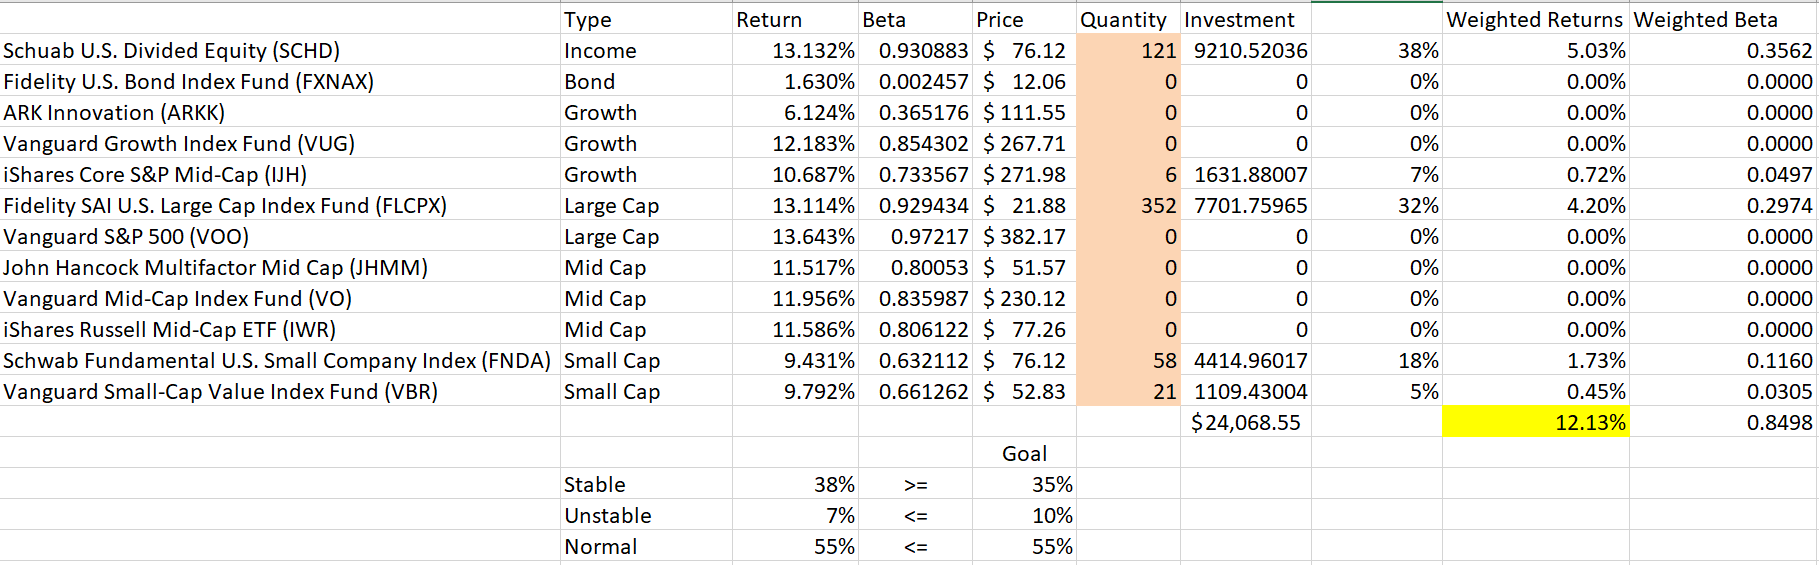

In [73]:
portfolio_mix = final_table4[(final_table4['Fund']=='Schuab U.S. Divided Equity (SCHD)') | (final_table4['Fund']=='iShares Core S&P Mid-Cap (IJH)') | (final_table4['Fund']=='Fidelity SAI U.S. Large Cap Index Fund (FLCPX)') | (final_table4['Fund']=='Schwab Fundamental U.S. Small Company Index (FNDA)') | (final_table4['Fund'] == 'Vanguard Small-Cap Value Index Fund (VBR)')]
portfolio_mix['Quantity'] = [121,6,352,58,21]
portfolio_mix['Investment'] = portfolio_mix['Quantity']*portfolio_mix['Price']
portfolio_mix['Weight'] = portfolio_mix['Investment'] / portfolio_mix['Investment'].sum()
portfolio_mix['Weighted Return'] = portfolio_mix['Expected Return']*portfolio_mix['Weight']
portfolio_mix['Weighted Beta'] = portfolio_mix['Beta']*portfolio_mix['Weight']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

***Aggregated Weight Information***

In [74]:
portfolio_mix

,Fund,Type,St.Dev of Returns,Beta,Expected Return,Sharpe Ratio,Alpha,Price,Quantity,Investment,Weight,Weighted Return,Weighted Beta
0,Schuab U.S. Divided Equity (SCHD),Income,0.047604,0.930883,0.131317,2.422426,0.023428,76.120003,121,9210.520363,0.382679,0.050252,0.356229
8,iShares Core S&P Mid-Cap (IJH),Growth,0.059406,0.733567,0.106874,1.529707,0.022992,271.980011,6,1631.880066,0.067801,0.007246,0.049737
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,0.048791,0.929434,0.131138,2.359813,0.012898,21.879999,352,7701.759648,0.319993,0.041963,0.297412
15,Schwab Fundamental U.S. Small Company Index (F...,Small Cap,0.066433,0.632112,0.094306,1.178715,0.041057,76.120003,58,4414.960174,0.183433,0.017299,0.115950
17,Vanguard Small-Cap Value Index Fund (VBR),Small Cap,0.063564,0.661262,0.097917,1.288728,0.022649,52.830002,21,1109.430042,0.046095,0.004513,0.030481


### **Final Portfolio**

Our final portfolio invests a total of $24,068.55 and has a bit of investment in most fund types with the following weights:
1. Schuab U.S. Divided Equity (SCHD) - ***38.27%***
2. iShares Core S&P Mid-Cap (IJH) - ***6.78%***
3. Fidelity SAI U.S. Large Cap Index Fund (FLCPX) - ***31.99%***
4. Schwab Fundamental U.S. Small Company Index (FDNA) - ***18.34%***
5. Vanguard Small-Cap Value Index Fund (VBR) - ***4.61%***

In [75]:
portfolio_mix2 = portfolio_mix[['Fund','Type','Price','Quantity','Investment','Weight','Weighted Return','Weighted Beta']]
portfolio_mix2

,Fund,Type,Price,Quantity,Investment,Weight,Weighted Return,Weighted Beta
0,Schuab U.S. Divided Equity (SCHD),Income,76.120003,121,9210.520363,0.382679,0.050252,0.356229
8,iShares Core S&P Mid-Cap (IJH),Growth,271.980011,6,1631.880066,0.067801,0.007246,0.049737
9,Fidelity SAI U.S. Large Cap Index Fund (FLCPX),Large Cap,21.879999,352,7701.759648,0.319993,0.041963,0.297412
15,Schwab Fundamental U.S. Small Company Index (F...,Small Cap,76.120003,58,4414.960174,0.183433,0.017299,0.115950
17,Vanguard Small-Cap Value Index Fund (VBR),Small Cap,52.830002,21,1109.430042,0.046095,0.004513,0.030481


The final portfolio return is ***12.13%*** and the final portfolio beta is ***0.8498.***

In [76]:
portfolio_fig = px.pie(data_frame=portfolio_mix2,values='Weight',names='Fund',title='Portfolio Mix',template='plotly_dark',hover_name='Fund',hover_data=['Weighted Return'])
portfolio_fig